## IMPORT LIBRARIES

In [41]:
!pip install diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.programming.language import Python
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.aws.network import ELB
from diagrams.aws.compute import EC2
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.workflow import Airflow
from diagrams.programming.framework import FastAPI
from urllib.request import urlretrieve
from diagrams.digitalocean.compute import Docker
from diagrams.onprem.database import Mongodb


Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label


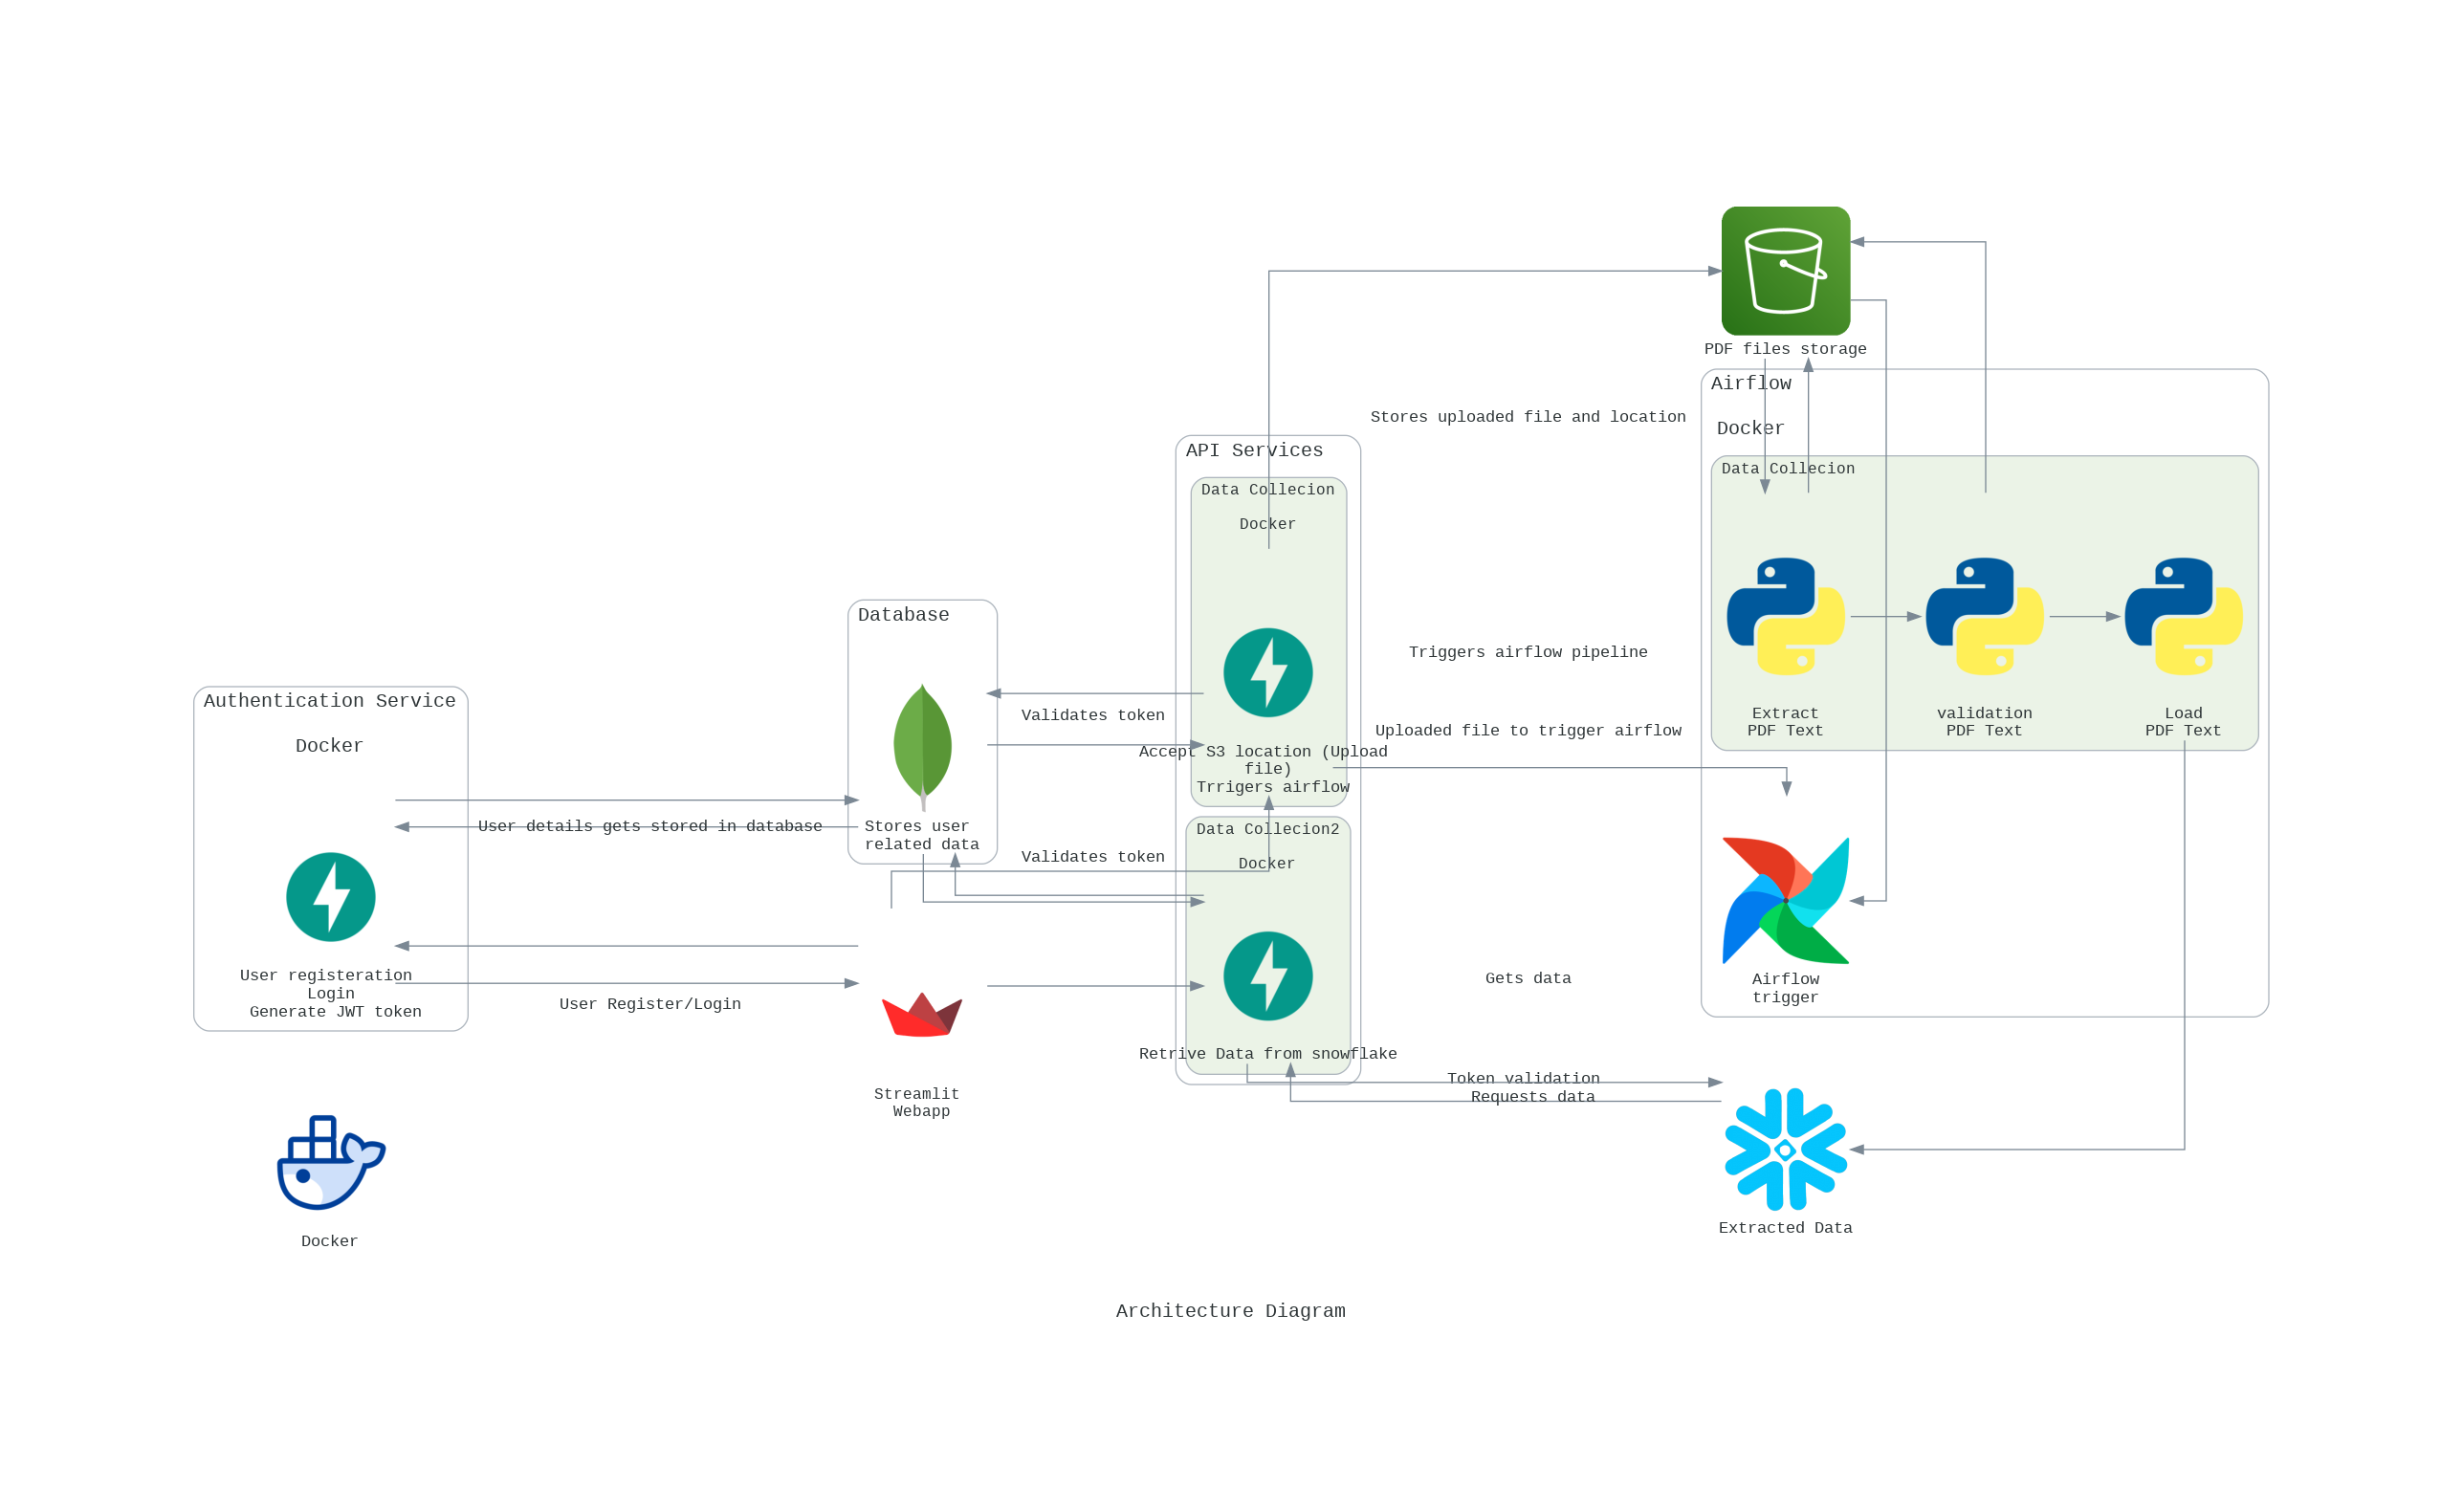

In [142]:
from diagrams import Diagram, Cluster
from diagrams.programming.language import Python

graph_attr = {
  "width": "1000",
  "height": "1000"
}

cluster_attr = {
    "bgcolor": "white",
    "fontsize":"15"
}

with Diagram("\n\nArchitecture Diagram", show=False, graph_attr=graph_attr, direction="LR") as diag:
    docker3 = Docker("Docker")
    s3 = S3("PDF files storage")
    snowflake = Snowflake("Extracted Data")

    with Cluster("Database", graph_attr=cluster_attr):
      mongodb = Mongodb("Stores user \nrelated data")



    with Cluster("API Services", graph_attr=cluster_attr):
        with Cluster("Data Collecion\n\nDocker"):
          fast_api_1 = FastAPI("Accept S3 location (Upload \n file) \n Trrigers airflow")
        with Cluster("Data Collecion2\n\nDocker"):
          fast_api_2 = FastAPI("Retrive Data from snowflake")
        fast_api_1 >> Edge(label = "Validates token") >> mongodb >> fast_api_1
        fast_api_2 >> Edge(label = "Validates token") >>mongodb >> fast_api_2

    with Cluster("Authentication Service\n\nDocker", graph_attr=cluster_attr):
      fast_api_3 = FastAPI("User registeration \n Login \n Generate JWT token")

    with Cluster("Airflow\n\nDocker", graph_attr=cluster_attr):
      airflow = Airflow("Airflow\ntrigger")


      with Cluster("Data Collecion"):
        py_pdf_extraction = Python("\nExtract\nPDF Text")
        py_pdf_validation = Python("\nvalidation\nPDF Text")
        py_pdf_load = Python("\nLoad\nPDF Text")
        s3 >> py_pdf_extraction >> s3
        py_pdf_validation >> s3
        # py_pdf_load >> Edge(label = "Temporary storage") >>  s3

    streamlit_icon = "openstack.png"
    streamlit_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAABI1BMVEX/////Kyq9QUN9NDv9//////3//v3/Kin9Kyu+QEP7/////f98NTt9NTr/Kif/KSu9QUF9ND7BP0P/AAD9Ky57Nju3QUK3QUa8QEX/HRm7PT/BPkX++ff9IyJ8NT6AMzpwHSX9xML+jo53KTDeNjX+nZ7KOzvsMTD/DQ/y09Tjs7Dz3N7Tk5S5ISm7LzTdpqW9UlbShobAMTjWmpXux8j88/r9UFL/panCnaGLVVv+ubP/srHSe3zGqqlwBRjbzMv9ODjVv8OHRkv+aWj/WV/91NWsgof/4uH9c3Hr4N+fcnR0FiL/foOxjZD97vd5IC/LbG6MSFOQXVidZ27+REX/z9CKJi6qOz+TNz3/b2vXNjiNREv/7OjpMTSoeIGLND39h4g2Ebv+AAAJ5klEQVR4nO2ci1/TWBbH87h5tk3SNA1JmpBCBINKd9xVQaorClifg45lYJi6O///X7HnpoW+kjYU0s7yOV8+oJ9KIb+cc8/r3sgwCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIKsFEEUCcOQVV9GgRCiMoJA7rFEkdl59Jgh4qqvo0Ce7LZ2/8Goq76MYhDBO3d2FU7ZBSsK99FRQZTveI7heL8IJSKs+nKKQGCetpSGrRitJxBz7qFEgUl8VDEMs/X4/mUMmgV9x+D6eL8w9y5jqKDx6T+5K1r/un9GZMizlqFcKTQgnt431OceRJlrhd7a3zDSCIKgEkZcqB4RVOapxw2BYPME/HQhldS9S4u9dQ4i1JRQOi/47mctZVQhpIzHcJ2LXQd8KSShErL5Yk9UF6q4wEcNblShbXqOsKAhxP2X+wu9cS4HtSDW24vFwFeeM6rQUTin9XSh+pS8DqPo328Wuop57LmsFcSHByqtSMTcVycI1EdNbhJndwfWdX6RhP4g5m29yfN8820RyUbt1WRLloK4u6FCzMl/aSLkek8xpiSaEE9vcKGJvnfNKgjkT/0iOrASOQo0VpZZrXZ8QvKvdIgMryAVTilsGOCnN6htCPPmHdivAgKj94U0YAI5iy1W0llZC2pHnRvcfYijjjGl0OCM1s4Nfv/HH5/DSrlMFX5+wxSRLsBsrKVZMksJah96cPvJXDcjhPhjiWIUz5n/A+g6BjUfP32O+D7Vyrs7kjT1q8imK+uJQI3VXfdLj0acOfcSBHzzshRy3tMcKxG+4+P7a308X26+viNFE4CUXtwXSG0paYG75c9ZRvCvKtSjTpZCY3cnh7f7X5tRfX2o8NS/I0kTiBBBjwOLHRhR1iXWDfb8mUuelNRfW56SaUNO4eZerbB/GvHr1fBaYfTp7kRNsREP1uEALdagBBCgWE03pkBzfaY8qtCjeT/V00vJGhX2o4gfqqM0i0n3fUiga6MKdUtzLapRSB8tlaBnmimwH08zPBVefl2FBFEujwoM/yxQIEM2g3GFmiZrUAKQjPwo+K3pTD+u0Wj46e8lNMGflkMw4JjCqKA400ft1PRRhbJm6awexC9OMswwI45SHNNxWq8yctub780wrFT4CZq/FjkfEMiLgE0hiI87NGGqE9f6qOXMVEhp7O6Al4+8ExwCJLz5rRmWJ9VV1sPoR6EDECIexGkKLShz/ugx4xWAwPie15jjpRzN+2M7GclfoYCJ+HI4qZDn1yHOFDriISVXS5Uog69+SEqAq28Fq3xrGeZ8hQb46Ugspgn+0ynP18vTNuTD+rpQ6MAcbvYXN02hpLGSHLib/rBDFplHuw6Xne2vBYLEZ6MTYv99MworYZiisBxGX5lSkdsecPs6Nc1KNSPV6Qa0zBH66aM3M1GM+alJ8z4hIuRA/+tpNBVdhgqbHwuU19dIukGmQjAllDlwi5PW9tvMXD8G+GkpcT2a4OvVLIF8PXpZtEDo9tqxniWQ1WVdi+WDZJ/30Yx6dMpTd58lBQwk+Ap453qmxObbgvXBOhR8V5KzFMo6/aAlANNL63ozFSZ++hYKmGqVr0/nwGuiZWyuki+BlGnEPlACnIGPQsVNP/KgeK+gg89WdiXw6xIEMsxJbY5AQHPlbVsxFM6er44KhOLt92pa/hvntPA4QyFMNzPSXHsrFflwe81WzFw2VKhHV/jsENMnfLmkgxx7qSlxDN2COof92bDt6TFiCrbpKN45P89Lm6/JYrsKN0R4HktQc893VUgeD8w1g8sXcQzzor5emeGo5cppaSk2JCLzB5TfVg6F4KryA89WcmYNha+H5XqmQDpEXA4C2YhZKZdCSZZZ6zJfXjRt87xe52cYsdDmfhSRECuXkwI6VAeadbmWx0u5hnFRr2auxbD+5xI3jrdcNruwSfFVqlHh5sdVp1LPVFgtaoiYBunFOW145a3S4baTYz0q59MN07XCooaI6RwFmZVbukKNpsccrnqRKTH6tMzTDRBrbqRQl1ldkx5uz6twFNPJ9NKim/txBEa7yTq8tuRPc41zbCNzPUK0OV+vTLcWlTo098uTRyGb8+uaNI36T9OeUQCAdudivTxtxzJ/us8s89AmNPA5yu8UhZAhHyhr2THVhIAbpiX9MjT3yzygQkjGWHEOlqzroDG741AMQ7FTmvx69Fux85kUiQdxvrotzZLapW1DuZoxSzUvylCfjqmsVAtv7qcECkKgLRJtBp2VdemkbAv3zWg3KtWJWTcU5Es+Q0Xodmmg3ShjjEq0JB1SR3oBYDSU83p5opNaUnM/RBRKTKe2qJvKEG8gPz7cTpXoGA6tT8e8tPp5Kc39BGp3kVgzKpTasaFAdJnukifiafRyqYF0AGnH8yZSs5HopMOzYTlOhVblfHxH7fTtKs6jkucLJf2hCWVJkzVa5jhTIccGPx2zob8ShcyXW7mppFvJBFl6MB1TIZWMdsLQ3K/kSDE5qdEjUrdFhtTBOY4zuhgNZViflquV5uMc524KECiS+WPFPEBnJV96tB4fnpLmhvVpuRp+Z8gqTr4LYp6xYg50K5nm2M7YejTN8GrwVuzO/QwI49du76SsTudVsiRRjUN9EGHP+/VpOYyW2tyPa/wQsHegcQDtkOmkw+ESWyomxFOoT8PoPysTyDBnN5zXzMKS6BQAUodxdYaqAfKg9/28rCFiGuTwdkl/FF3XIUNCKWc3+lmfM88rdH76faVPn2y5C/UXaSTeAPXqT2/NGEhM6tNofxUV2xVqL/XwyS35adrQQ5mGYjj/rfPN1cUZCjm6Zfk9DaxHFsochYP0oazVox8rFajSLYy7R9b1S1tp0AdPLpa2WZGOwJC8Oxg3QJdhPcqQHhX4uFjt4+0qIXsx3Q4tAChXbc7YfbQ6dRSBEcVucPdWpECdc7jtfVutQPAflel17zDtj6BpuhYfiSt+ElMtERGa/cNa7LpBoN1R+pckLQhcN47l9t/lUVO1t9He+nLUlWIAtPaTNw0YMk3kdJuU7jdq/ddl+kpyMyT6J9yXpGqQWXr8nwqLpe7xX1vtjc6qdY2iJscnVb8DUv866gZuLZFK7QqNA63I6OcA+oos60lHIVtgr8RiNZftHoGws45foj+MrKTrzYYMviTXpjJ+56y9t/nhuGtRm8R9244SX73uHnaPP2zuHYCwRNRAVfKkyt9IYSJt8EgCPfFCdxjUZHuDIX6vc3K2cdBu7+1tXbPXbh9snJ10ej59C+nbSyQitNWqMFAn/r/8rwSkL2D42T/HzQxeQBAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRBkFfwPFgzq/Y3UEP8AAAAASUVORK5CYII="
    urlretrieve(streamlit_url, streamlit_icon)
    streamlit_app = Custom("Streamlit \nWebapp", streamlit_icon, edge_label=" ", fontsize="12")




    fast_api_1 >> Edge(label = "Triggers airflow pipeline") >> airflow

    fast_api_3 >> streamlit_app
    streamlit_app >>  fast_api_1
    streamlit_app >> fast_api_2
    fast_api_1 >> Edge(label = "Stores uploaded file and location") >>  s3
    py_pdf_extraction >> py_pdf_validation >> py_pdf_load
    py_pdf_load >> snowflake
    snowflake >> Edge(label = "Token validation \n Requests data") >> fast_api_2
    fast_api_2 >> Edge(label = "Gets data") >> snowflake
    s3 >> Edge(label = "Uploaded file to trigger airflow") >> airflow
    streamlit_app >> Edge(label = "User Register/Login") >> fast_api_3
    fast_api_3 >> Edge(label = "User details gets stored in database") >> mongodb
    mongodb  >> fast_api_3
    # py_pdf_load >> snowflake

diag

